In [272]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [432]:
class Solver:
    def __init__(self, ax, ay, bx, by, c, 
    left_border_condition, left_a, left_b, 
    right_border_condition, right_a, right_b, 
    bottom_border_condition, bottom_a, bottom_b, 
    top_border_condition, top_a, top_b, 
    left_border, right_border, bottom_border, top_border,
    nx, ny) -> None:

        self.ax = ax
        self.ay = ay
        self.bx = bx
        self.by = by
        self.c = c
        self.left_border = left_border
        self.right_border = right_border
        self.top_border = top_border
        self.bottom_border = bottom_border

        self.lx = right_border-left_border
        self.ly = top_border-bottom_border

        self.nx = nx
        self.ny = ny

        self.hx = self.lx/(nx-1)
        self.hy = self.ly/(ny-1)

        self.left_border_condition = left_border_condition
        self.right_border_condition = right_border_condition
        self.top_border_condition = top_border_condition
        self.bottom_border_condition = bottom_border_condition

        self.left_a = left_a
        self.left_b = left_b

        self.right_a = right_a
        self.right_b = right_b

        self.top_a = top_a
        self.top_b = top_b

        self.bottom_a = bottom_a
        self.bottom_b = bottom_b

    def solve_libman(self, boundary_conditions_interpolation, e):
        ax = self.ax
        ay = self.ay
        bx = self.bx
        by = self.by
        c = self.c
        left_border = self.left_border
        right_border = self.right_border
        bottom_border = self.bottom_border
        top_border = self.top_border

        lx = self.lx
        ly = self.ly

        hx = self.hx
        hy = self.hy

        nx = self.nx
        ny = self.ny

        left_border_condition = self.left_border_condition
        right_border_condition = self.right_border_condition
        bottom_border_condition = self.bottom_border_condition
        top_border_condition = self.top_border_condition

        left_a = self.left_a
        left_b = self.left_b

        right_a = self.right_a
        right_b = self.right_b

        top_a = self.top_a
        top_b = self.top_b

        bottom_a = self.bottom_a
        bottom_b = self.bottom_b

        hist = np.zeros((nx, ny, 0))
        u = np.zeros((nx, ny, 1))
        next_u = np.empty((nx, ny, 1))
        cur_e = np.Infinity
        while True:
            cur_e = -np.Infinity
            for x in range(1,nx-1):
                for y in range(1, ny-1):
                    next_u[x,y,0] = ((u[x-1,y,0]+u[x+1,y,0])/(hx*hx)+(u[x,y-1,0]+u[x,y+1,0])/(hy*hy))/(2*(1.0/(hx*hx)+1.0/(hy*hy)))
            if boundary_conditions_interpolation == '2_points_1st_order':
                for x in range(1, nx-1):
                    next_u[x,0,0] = (bottom_border_condition(left_border+x*hx)-(bottom_a/hy)*next_u[x,1,0])/(bottom_b-(bottom_a/hy))
                    next_u[x,-1,0] = (top_border_condition(left_border+x*hx)+(top_a/hy)*next_u[x,-2,0])/(top_b+(top_a/hy))
                for y in range(1, ny-1):
                    next_u[0,y,0] = (left_border_condition(bottom_border+y*hy)-(left_a/hx)*next_u[1,y,0])/(left_b-(left_a/hx))
                    next_u[-1,y,0] = (right_border_condition(bottom_border+y*hy)+(right_a/hx)*next_u[-2,y,0])/(right_b+(right_a/hx))
            for x in range(1,nx-1):
                for y in range(1, ny-1):
                    cur_e = max(cur_e, np.abs(next_u[x,y,0]-u[x,y,0]))
            u, next_u = next_u, u
            hist = np.append(hist, u, 2)
            print(cur_e)
            if not cur_e > e and cur_e != 0.0:
                break
        return hist

In [433]:
# вариант 3
def true_u(x, y):
    return np.exp(x)*np.cos(y)

left_border = 0
right_border = 1
bottom_border = 0
top_border = np.pi/2

def left_border_condition(y):
    return np.cos(y)
def right_border_condition(y):
    return np.e*np.cos(y)
def bottom_border_condition(x):
    return 0.0
def top_border_condition(x):
    return -np.exp(x)

nx = 10
ny = 10

solver = Solver(1, 1, 0, 0, 0,
left_border_condition, 0, 1,
right_border_condition, 0, 1,
bottom_border_condition, 1, 0,
top_border_condition, 1, 0,
left_border, right_border, bottom_border, top_border,
nx, ny)

In [335]:
# вариант 2 
def true_u(x, y):
    return x**2-y**2

left_border = 0
right_border = 1
bottom_border = 0
top_border = 1

def left_border_condition(y):
    return 0
def right_border_condition(y):
    return 1-y**2
def bottom_border_condition(x):
    return 0.0
def top_border_condition(x):
    return x**2-1

nx = 10
ny = 10

solver = Solver(1, 1, 0, 0, 0,
left_border_condition, 1, 0,
right_border_condition, 0, 1,
bottom_border_condition, 1, 0,
top_border_condition, 0, 1,
left_border, right_border, bottom_border, top_border,
nx, ny)

In [372]:
# вариант 4
def true_u(x, y):
    return np.sin(x)*np.exp(y)

left_border = 0
right_border = np.pi
bottom_border = 0
top_border = 1

def left_border_condition(y):
    return np.exp(y)
def right_border_condition(y):
    return -np.exp(y)
def bottom_border_condition(x):
    return np.sin(x)
def top_border_condition(x):
    return np.e*np.sin(x)

nx = 10
ny = 10

solver = Solver(1, 1, 0, 0, 0,
left_border_condition, 1, 0,
right_border_condition, 1, 0,
bottom_border_condition, 0, 1,
top_border_condition, 0, 1,
left_border, right_border, bottom_border, top_border,
nx, ny)

In [434]:
u = solver.solve_libman('2_points_1st_order', 0.00000001)

0.0
0.9524706821635793
0.3388888595788609
0.196502023375426
0.16684500897321297
0.1272792299733856
0.10636892362473593
0.08899182207846035
0.07988208855052592
0.07380220518665315
0.06819359972044703
0.0632679599315552
0.05880824541031082
0.055618081100547445
0.0528752111029821
0.05019881002143134
0.04764659507477187
0.04520197794405589
0.0428938177985182
0.04069639698881222
0.03862862742511064
0.036662457566641216
0.034813917617873
0.03305502445883324
0.03140138468907194
0.029825900548430484
0.028344391554482096
0.02693094639239324
0.025601546751812032
0.024331616963979785
0.02313703294571967
0.02199465626608932
0.020919963261579078
0.01989132656354653
0.01892357498299857
0.01799663702649701
0.01712451210980115
0.01628869806273725
0.015502247771159716
0.014748211437114467
0.014038633548655977
0.013358073218023625
0.012717548361750985
0.012103062456530589
0.011524621304801697
0.010969592900419212
0.010447008479098852
0.009945510789105105
0.009473209377626635
0.009019926680505108
0.00859

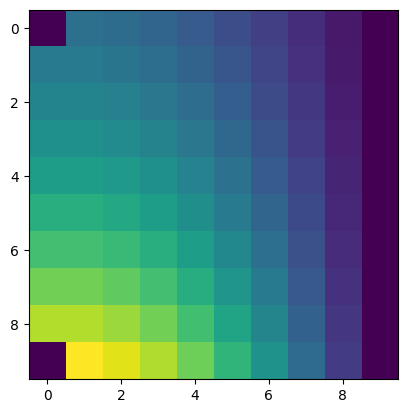

In [435]:
# plt.imshow(u[1:-2, 1:-2, -1])
plt.imshow(u[:, :, -1])

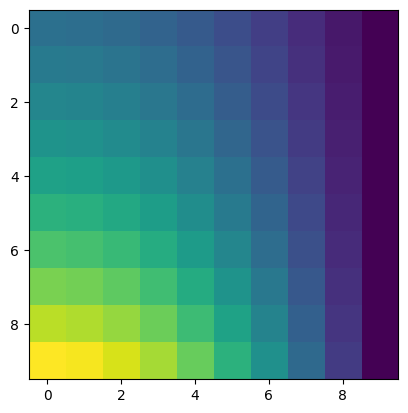

In [436]:
tu = np.empty((solver.nx, solver.ny))

for x in range(solver.nx):
    # print(left_border+(x)*solver.hx)
    for y in range(solver.ny):
        tu[x,y] = true_u(left_border+(x)*solver.hx, bottom_border+(y)*solver.hy)
# plt.imshow(tu[1:-2, 1:-2])
plt.imshow(tu[:, :])

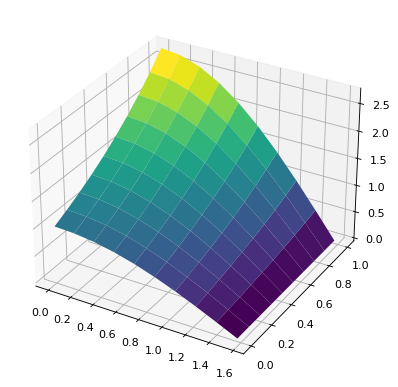

In [437]:
y = np.linspace(left_border, right_border, solver.nx)
x = np.linspace(bottom_border, top_border, solver.ny)
X, Y = np.meshgrid(x, y)
Z = tu[:, :]

plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

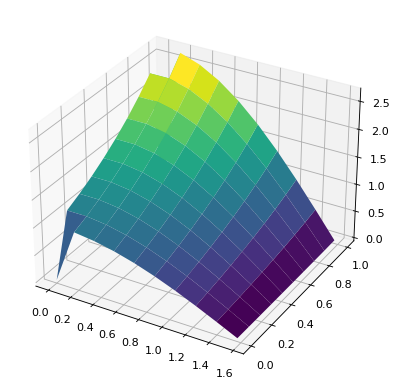

In [438]:
y = np.linspace(left_border, right_border, solver.nx)
x = np.linspace(bottom_border, top_border, solver.ny)
X, Y = np.meshgrid(x, y)
Z = u[:, :, -1]

plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

In [439]:
error = 0
for x in range(1, solver.nx-1):
    for y in range(1, solver.ny-1):
        error = max(error, abs(u[x,y,-1]-tu[x,y]))

error

0.04267092407106321

In [285]:
# вариант 3
def true_u(x, y):
    return x+y

left_border = 0
right_border = 1
bottom_border = 0
top_border = 1

def left_border_condition(y):
    return y
def right_border_condition(y):
    return 1+y
def bottom_border_condition(x):
    return x
def top_border_condition(x):
    return 1+x

nx = 10
ny = 10

solver = Solver(1, 1, 0, 0, 0,
left_border_condition, 0, 1,
right_border_condition, 0, 1,
bottom_border_condition, 0, 1,
top_border_condition, 0, 1,
left_border, right_border, bottom_border, top_border,
nx, ny)
u = solver.solve_libman('2_points_1st_order', 0.000001)

0.9444444444444444
0.3402777777777778
0.2222222222222222
0.14756944444444442
0.13541666666666674
0.10042317708333337
0.08711751302083337
0.07476806640624989
0.06842041015624994
0.058948516845703125
0.056982994079589955
0.05009877681732189
0.047526687383651844
0.04356326535344124
0.04084106348454958
0.03813294880092144
0.036267930176109076
0.033790002518799156
0.03198435289232293
0.02978822547083848
0.02811686952418302
0.026198945345186186
0.024687103603525662
0.023022604431730875
0.021671787927546426
0.02022997231756496
0.01903104879219719
0.017781692661288595
0.016721374101306474
0.01563722478803342
0.014701214289893572
0.01375863755061879
0.01293308816180161
0.012111952015272598
0.011384081538953317
0.010667360594527775
0.010025652641257543
0.009398969026383819
0.008833178555834542
0.008284368918309748
0.007785441848027763
0.007304181322664194
0.0068641422359806414
0.006441630403116072
0.006053464159752053
0.005682167658979775
0.005339706512377251
0.00501314972744904
0.00471097053336

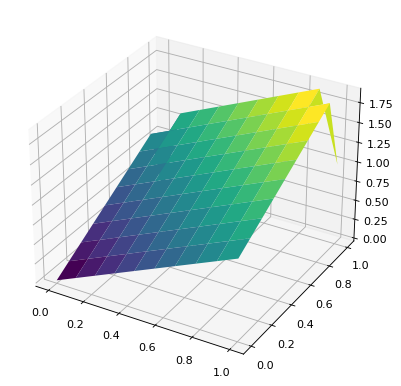

In [286]:
y = np.linspace(left_border, right_border, solver.nx)
x = np.linspace(bottom_border, top_border, solver.ny)
X, Y = np.meshgrid(x, y)
Z = u[:, :, -1]

plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

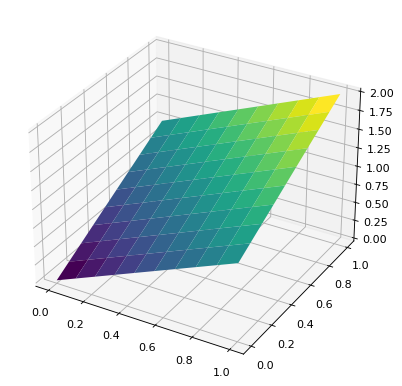

In [287]:
tu = np.empty((solver.nx, solver.ny))

for x in range(solver.nx):
    # print(left_border+(x)*solver.hx)
    for y in range(solver.ny):
        tu[x,y] = true_u(left_border+(x)*solver.hx, bottom_border+(y)*solver.hy)

y = np.linspace(left_border, right_border, solver.nx)
x = np.linspace(bottom_border, top_border, solver.ny)
X, Y = np.meshgrid(x, y)
Z = tu[:, :]

plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

In [288]:
error = 0
for x in range(1, solver.nx-1):
    for y in range(1, solver.ny-1):
        error = max(error, abs(u[x,y,-1]-tu[x,y]))

error

1.548875076506917e-05

In [ ]:
for x in range(1, nx-1):
                    u[x,0,0] = (bottom_border_condition(left_border+x*hx)-(bottom_a/hx)*u[x,1,0])/(bottom_b-(bottom_a/hx))
                    # print(x, left_border+x*hx)
                    u[x,-1,0] = (top_border_condition(left_border+x*hx)+(top_a/hx)*u[x,-2,0])/(top_b+(top_a/hx))
for y in range(1, ny-1):
    u[0,y,0] = (left_border_condition(bottom_border+y*hy)-(left_a/hy)*u[1,y,0])/(left_b-(left_a/hy))
    u[-1,y,0] = (right_border_condition(bottom_border+y*hy)+(right_a/hy)*u[-2,y,0])/(right_b+(right_a/hy))

for (int i = 1; i < nx; ++i) {
  next_u[i][0] = Relax(u[i][0], (pde.gamma_y0(x[i]) - pde.alpha_y0 / hy * next_u[i][1]) / (pde.beta_y0 - pde.alpha_y0 / hy), relax);
  next_u[i][ny] = Relax(u[i][ny], (pde.gamma_y1(x[i]) + pde.alpha_y1 / hy * next_u[i][ny-1]) / (pde.beta_y1 + pde.alpha_y1 / hy), relax);
  eps_k = std::max(eps_k, std::abs(next_u[i][0] - u[i][0]));
  eps_k = std::max(eps_k, std::abs(next_u[i][ny] - u[i][ny]));
}
for (int i = 1; i < ny; ++i) {
  next_u[0][i] = Relax(u[0][i], (pde.gamma_x0(y[i]) - pde.alpha_x0 / hx * next_u[1][i]) / (pde.beta_x0 - pde.alpha_x0 / hx), relax);
  next_u[nx][i] = Relax(u[nx][i], (pde.gamma_x1(y[i]) + pde.alpha_x1 / hx * next_u[nx-1][i]) / (pde.beta_x1 + pde.alpha_x1 / hx), relax);
  eps_k = std::max(eps_k, std::abs(next_u[0][i] - u[0][i]));
  eps_k = std::max(eps_k, std::abs(next_u[nx][i] - u[nx][i]));
}